#Trabajo Final - ¿Cómo prevenir el attrition de clientes de una entidad bancaria?
#Curso: DataScience (CoderHouse)
#Autor: Pedro Saravia

# Abstracto
Para el desarrollo del proyecto final de la cursada de Data Science en CoderHouse se seleccionó el dataset "BankChurners" descargado de la plataforma Kaggle.com (https://www.kaggle.com/datasets/syviaw/bankchurners), el cual contiene un listado de clientes con sus respectivos datos demográficos (genero, edad, estado civil, etc.) y datos sobre su tarjeta de crédito, límite de consumo, nivel de ingresos, meses de inactividad y otros datos sobre el comportamiento de consumo de los mismos.
Con el análisis y las visualizaciones obtenidas de estos datos, se pretende realizar recomendaciones a los directivos del banco, en específico a los encargados de marketing, acerca de a qué grupo de clientes conviene dirigir campañas de retención y/o fidelización para evitar su abandono como cliente de la institución, por lo que se podría definir el problema a resolver como uno de "clasificación".

### Exploración del Dataset BankChurners

In [163]:
# Importación de las librerías necesarias:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [164]:
# Importación del dataset en cuestión:

Sheet_url = 'https://raw.githubusercontent.com/PedroSaravia1981/DataScience_Coderhouse/main/BankChurners.csv'
df_creditcards = pd.read_csv(Sheet_url)
df_creditcards.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [165]:
# Observación de los tipos de datos que contiene el dataframe
df_creditcards.dtypes 

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [166]:
# Eliminación de columnas que no son necesarias
df_creditcards.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', inplace=True, axis=1)
df_creditcards.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', inplace=True, axis=1)

In [167]:
# creamos una copia del dataframe original
df = df_creditcards.copy()

# obtenenmos la dimension del dataframe:
df.shape

(10127, 21)

##Resumen de metadata
El dataset mencionado cuenta con 10.127 registros. Cada uno representa un cliente del banco y tiene a su vez 21 campos que lo caracterizan y definen su comportamiento de consumo en base a la información relevada por la institución. A continuación describiremos dichos campos:

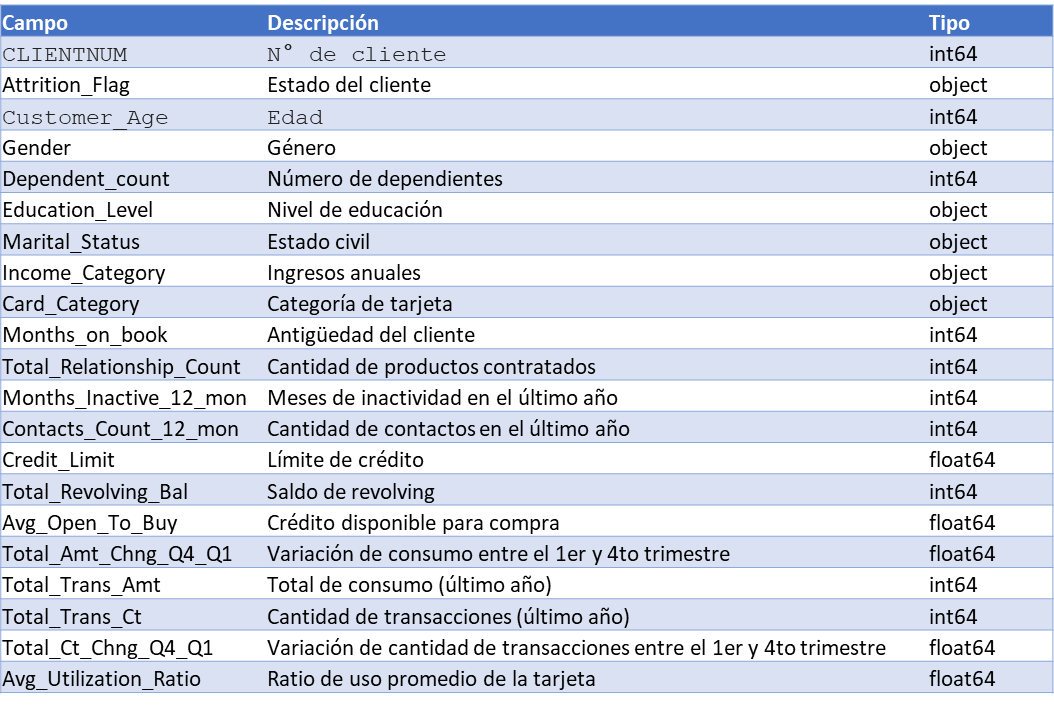

In [168]:
 # Análisis de los datos de cada variable
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Data Wrangling

Se detectaron muchos valores definidos como "Unknown". Para lidiar con ellos lo primero que haremos es reemplazarlos por la etiqueta "NaN" para luego poder utilizar la función "is na" y así conocer la cantidad de valores nulos que hay en cada campo.

In [169]:
# Reemplazamos los valores "Unknown" por la etiqueta "NaN"
df.replace("Unknown", np.nan, inplace = True)

# Verificamos si los reemplazos tuvieron lugar:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [170]:
# Ahora podemos utilizar la función "isna" para detectar la cantidad de valores nulos en cada campo
df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Detectamos entonces que las categorías de Nivel de Educación, Estado Civil y Nivel de Ingresos cuentan con un 7% a 15% aproximadamente de datos nulos. Ya que pueden ser variables que resulten útiles para predecir el comportamiento de los clientes, no eliminaremos éstos campos sino que más bien reemplazaremos los valores nulos detectados por aquellos de mayor frecuencia en cada uno.

In [171]:
# Determinamos la frecuencia de los clientes en función a su nivel de educación
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [172]:
# Determinamos la frecuencia de los clientes en función a su estado civil
df['Marital_Status'].value_counts() 

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [173]:
# Determinamos la frecuencia de los clientes en función a su nivel de ingresos
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [174]:
# Reemplazamos los valores NaN por los de mayor frecuencia en sus respectivos campos
df["Education_Level"].replace(np.nan, "Graduate", inplace=True)
df["Marital_Status"].replace(np.nan, "Married", inplace=True)
df["Income_Category"].replace(np.nan, "Less than $40K", inplace=True)

In [175]:
# Verificamos que ya no existan datos nulos
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

En el análisis preliminar pareciera haber muchos datos extremos repetidos en el límite de crédito asignado (U$S34.516). Verificaremos esta afirmación con el siguiente código:

In [176]:
df['Credit_Limit'].value_counts()

34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: Credit_Limit, Length: 6205, dtype: int64

Verificada la presunción, en este caso reemplazaremos dichos valores extremos por la media del campo en cuestión

In [177]:
# Primero reemplazamos el valor extremo por la etiqueta "NaN" para que luego no formen parte del cálculo de la media del campo.
df["Credit_Limit"].replace(34516.0, np.nan, inplace=True)

# Verificamos que se hayan hecho los reemplazos
df.isna().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                508
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
dtype: int64

In [178]:
# Ahora si determinamos la media del campo en cuestión
avg_Credit_Limit=df['Credit_Limit'].astype('float').mean(axis=0)
print("Average of Credit_Limit:", avg_Credit_Limit)

Average of Credit_Limit: 7264.961752780954


In [179]:
# Reemplazamos los valores "NaN" por la media obtenida
df["Credit_Limit"].replace(np.nan, avg_Credit_Limit, inplace=True)

In [180]:
# Verificamos que ya no tenemos el valor extremo repetido y si en cambio el valor de la media obtenida con mayor frecuencia
df['Credit_Limit'].value_counts()

7264.961753     508
1438.300000     507
9959.000000      18
15987.000000     18
23981.000000     12
               ... 
9183.000000       1
29923.000000      1
9551.000000       1
11558.000000      1
10388.000000      1
Name: Credit_Limit, Length: 6205, dtype: int64

Nuestra variable objetivo es la de "Attrition Flag", donde se define si el cliente en cuestión es un cliente vigente del banco (Existing Customer) o si abandonó la cuenta (Attrited Customer).

In [181]:
df['Attrition_Flag'] 

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

Codificaremos a éstas categorías como 0 y 1 respectivamente.

In [182]:
df['Attrition_Flag_Value'] =  np.where(df['Attrition_Flag']=='Existing Customer', 0, 1)

In [183]:
# Verificamos la codificación realizada
df['Attrition_Flag_Value'] 

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag_Value, Length: 10127, dtype: int64

Dentro de los datos de los clientes tenemos el de su edad. Creamos la variable año de nacimiento (birth_year) para comprobar más adelante como se correlacionan ambos campos con los otros y ver entonces con cual quedarnos al momento de ejecutar el modelo de Machine Learning.

In [184]:
# Creamos entonces una variable derivada de año de nacimiento usando la fecha actual menos la variable Customer_Age
df['birth_year'] = (datetime.date.today().year - df.Customer_Age).astype(int)  

In [185]:
# Verificamos la creación del campo
df[['birth_year', 'Customer_Age']]

,birth_year,Customer_Age
0,1978,45
1,1974,49
2,1972,51
3,1983,40
4,1983,40
...,...,...
10122,1973,50
10123,1982,41
10124,1979,44
10125,1993,30


Entendemos que la variable "Nivel de Ingresos" (Income_Category) puede ser importante para definir el comportamiento de los clientes y la misma, para obtener mejores resultados, debería codificarse de manera que los valores más bajos correspondan a los de menores ingresos y los más altos a los de mayores ingreso. Para ello creamos entonces el campo "Income_Category_Value" a continuación:

In [186]:
# Identificamos entonces los valores únicos de la variable en cuestión:
df.Income_Category.unique()


array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

In [187]:
# De acuerdo al nivel de ingresos (Income_Category) asignamos un valor númerico a cada categoría:
df['Income_Category_Value'] =  np.where(df['Income_Category']=='Less than $40K', 1, 
                                np.where(df['Income_Category']=='$40K - $60K', 2,
                                np.where(df['Income_Category']=='$60K - $80K', 3,                                
                                np.where(df['Income_Category']=='$80K - $120K', 4,5))))

In [188]:
# Verificamos ahora que la asignación se haya hecho correctamente
df[['Income_Category', 'Income_Category_Value']]

,Income_Category,Income_Category_Value
0,$60K - $80K,3
1,Less than $40K,1
2,$80K - $120K,4
3,Less than $40K,1
4,$60K - $80K,3
...,...,...
10122,$40K - $60K,2
10123,$40K - $60K,2
10124,Less than $40K,1
10125,$40K - $60K,2


# Preguntas/Hipótesis
A continuacion analizamos los datos usando distintas agrupaciones para darnos una idea de como estan distribuidos los mismos:

In [189]:
# Al ser Attrition_Flag la variable objetivo para Clasificacion procedo a agrupar por ésta obteniendo la media para las otras variables
df.groupby(['Attrition_Flag']).mean() 

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Value,birth_year,Income_Category_Value
Attrition_Flag,,,,,,,,,,,,,,,,,,
Attrited Customer,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,6645.355744,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475,1.0,1976.340504,2.154886
Existing Customer,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,7383.561632,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412,0.0,1976.737882,2.203294


Se puede observar que en general para los clientes perdidos (Attrited Customer), se detectan los siguientes valores:
- Menor cantidad de productos adquiridos (Total_Relantionship_Count)
- Más meses de inactividad en el último año (Months_Inactiva_12_mon)
- Mayor cantidad de contactos realizados con el banco (Contacts_Count_12_Mon)
- Menor límite de crédito asignado (Credit_Limit)
- Tienen un menor "Revolving Balance"
- Tienen menor cantidad de transacciones y por montos más bajos.

In [190]:
# Determinación de la cantidad de clientes perdidos en relación al total de clientes:
serie_ClientePerdido = df_creditcards.Attrition_Flag.value_counts()
porcentaje_ClientePerdido = serie_ClientePerdido/len(df_creditcards)*100
porcentajes_redondeados = porcentaje_ClientePerdido.round(0)
porcentajes_formateado = porcentajes_redondeados.map(lambda x: f"{x}%")
print("Valores absolutos:")
print(serie_ClientePerdido)
print("Porcentajes:")
print(porcentajes_formateado)

Valores absolutos:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Porcentajes:
Existing Customer    84.0%
Attrited Customer    16.0%
Name: Attrition_Flag, dtype: object


De un total de 10.127 clientes, se perdieron 1.627, es decir un 16%.

In [191]:
# Agrupamos los clientes en función a su "Atrittion Flag" por nivel de educación y estado civil y calculamos los porcentajes de frecuencia de 
# cada categoría para cada estado del cliente.
groupby_education = df.groupby(['Attrition_Flag', 'Education_Level'])["CLIENTNUM"].count()
porcentajes_education = groupby_education / df.groupby("Attrition_Flag").size() * 100
porcentajes_educ_round = porcentajes_education.round(0)
porcentajes_educ_format = porcentajes_educ_round.map(lambda x: f"{x}%")
print("Porcentajes:")
print(porcentajes_educ_format)

Porcentajes:
Attrition_Flag     Education_Level
Attrited Customer  College             9.0%
                   Doctorate           6.0%
                   Graduate           46.0%
                   High School        19.0%
                   Post-Graduate       6.0%
                   Uneducated         15.0%
Existing Customer  College            10.0%
                   Doctorate           4.0%
                   Graduate           46.0%
                   High School        20.0%
                   Post-Graduate       5.0%
                   Uneducated         15.0%
dtype: object


In [192]:
groupby_marstatus = df.groupby(['Attrition_Flag', 'Marital_Status'])["CLIENTNUM"].count()
porcentajes_marstatus = groupby_marstatus / df.groupby("Attrition_Flag").size() * 100
porcentajes_marstatus_round = porcentajes_marstatus.round(0)
porcentajes_marstatus_format = porcentajes_marstatus_round.map(lambda x: f"{x}%")
print("Porcentajes:")
print(porcentajes_marstatus_format)

Porcentajes:
Attrition_Flag     Marital_Status
Attrited Customer  Divorced           7.0%
                   Married           52.0%
                   Single            41.0%
Existing Customer  Divorced           7.0%
                   Married           54.0%
                   Single            39.0%
dtype: object


### Hipótesis: Existe una correlación positiva entre la cantidad de veces que el cliente se contactó con la entidad y si resultó ser un cliente perdido (Attrited customer)

In [193]:
dfcorr = df.corr()

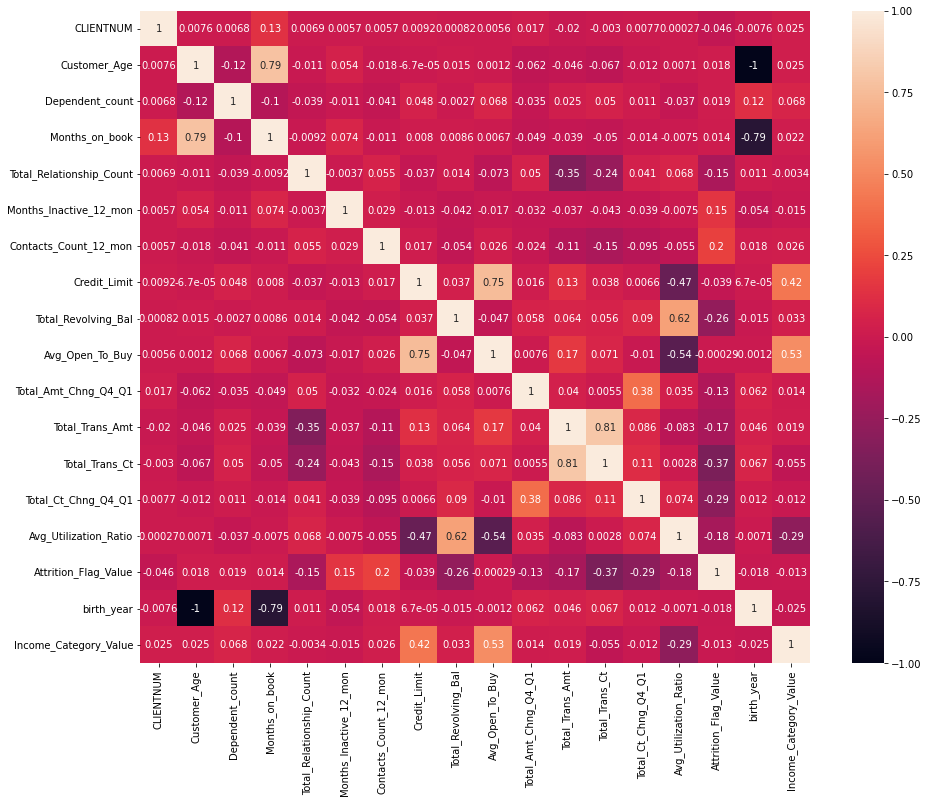

In [194]:
plt.figure(figsize=(15, 12))
sns.heatmap(dfcorr, annot=True)
plt.show()

De acuerdo a la matriz de correlación podemos observar que existe una correlación positiva, pero solo del 20%, es decir más bien baja. De todas formas continuamos el análisis de ésta variable para sacar mejores conclusiones con un gráfico de barras:

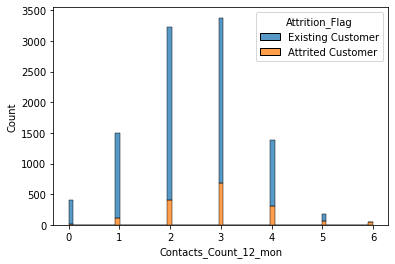

In [195]:
sns.histplot(data=df, x="Contacts_Count_12_mon", hue="Attrition_Flag", multiple="stack")

Daría la impresión que al incrementarse la cantidad de contactos realizados por el cliente se eleva el porcentaje de clientes perdidos. Confirmaremos esto viendo los porcentajes para cada valor:

In [196]:
groupby_Contacts_Count = df.groupby(['Contacts_Count_12_mon', 'Attrition_Flag'])["CLIENTNUM"].count()
porcentajes_Contacts_Count = groupby_Contacts_Count / df.groupby("Contacts_Count_12_mon").size() * 100
porcentajes_Contacts_Count_round = porcentajes_Contacts_Count.round(0)
porcentajes_Contacts_Count_format = porcentajes_Contacts_Count_round.map(lambda x: f"{x}%")
print("Porcentajes:")
print(porcentajes_Contacts_Count_format)

Porcentajes:
Contacts_Count_12_mon  Attrition_Flag   
0                      Attrited Customer      2.0%
                       Existing Customer     98.0%
1                      Attrited Customer      7.0%
                       Existing Customer     93.0%
2                      Attrited Customer     12.0%
                       Existing Customer     88.0%
3                      Attrited Customer     20.0%
                       Existing Customer     80.0%
4                      Attrited Customer     23.0%
                       Existing Customer     77.0%
5                      Attrited Customer     34.0%
                       Existing Customer     66.0%
6                      Attrited Customer    100.0%
dtype: object


Podemos ver entonces que en la medida que aumenta la cantidad contactos realizados por el cliente, aumenta el porcentaje de clientes pérdidos llegando incluso a un 100% de attrition cuando la cantidad de contactos realizados es de 6 veces en los últimos 12 meses. Se confirma la hipótesis nula.

### Hipótesis: Se pierden clientes de ingresos altos por no asignarles una tarjeta de mayor categoría (gold o platinum).

Para corroborar ésta hipótesis realizaremos primero un gráfico de barras con la frecuencia del tipo de tarjeta para cada nivel de ingresos de los clientes:

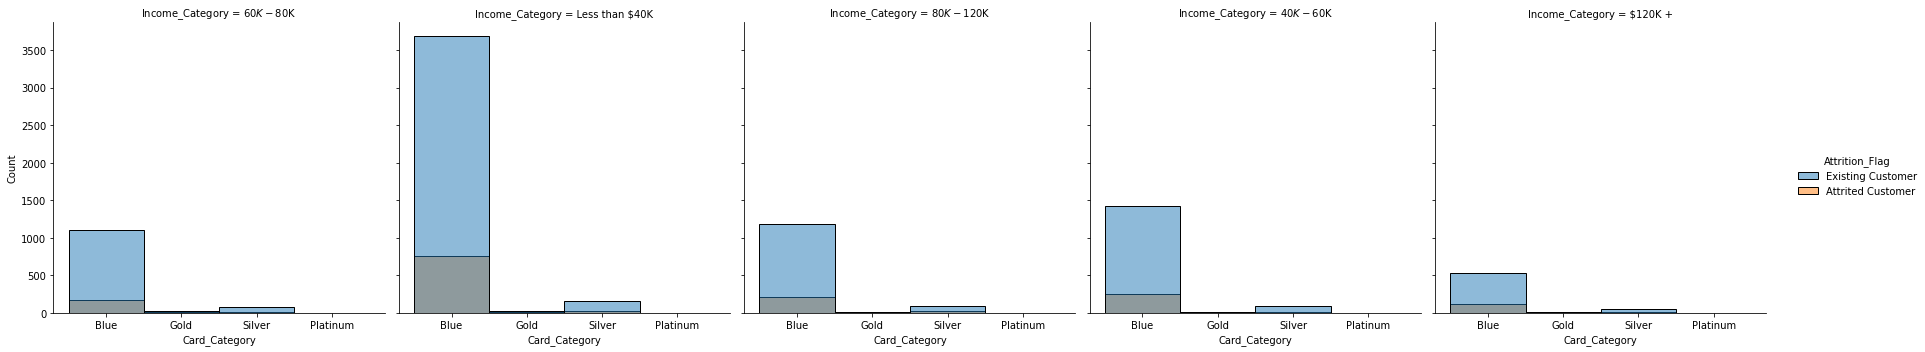

In [197]:
sns.displot(data=df , x="Card_Category", hue="Attrition_Flag", col="Income_Category")

En general, para los distintos niveles de ingresos se ve un porcentaje similar de pérdida de clientes para aquellos a los que no se les ofreció una tarjeta de mayor categoría a la tarjeta Blue, que es la de menor categoría, por lo que se rechaza la hipótesis planteada. Llama la atención igualmente, que haya tantos clientes con ingresos mayores a 80 y a 120 mil dólares anuales con tarjetas de categoría Blue, lo que nos invita a realizar otro gráfico para profundizar sobre este comportamiento:

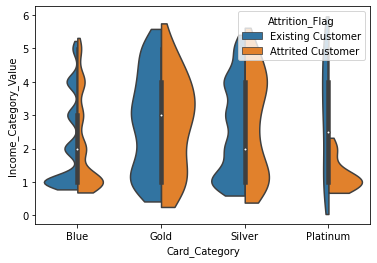

In [198]:
sns.violinplot(data=df, x="Card_Category", y="Income_Category_Value", hue="Attrition_Flag", split=True, cut=1)

El violin plot refleja algo curioso que es el hecho de que dentro de los usuarios de ingresos bajos y que se les asignó una tarjeta platinum, hay mucha deserción. Esto podría deberse a que los beneficios aportados por este tipo de tarjeta seguramente no puedan ser aprovechados por clientes de este segmento.

### Hipótesis: Existe una correlación positiva entre los meses de inactividad del cliente y si resultó ser un cliente perdido.

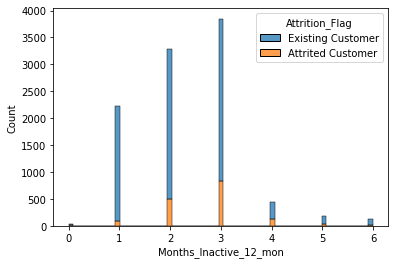

In [199]:
sns.histplot(data=df, x="Months_Inactive_12_mon", hue="Attrition_Flag", multiple="stack")

En este caso no se ve una correlación entre la cantidad de meses de inactividad y la tasa de abandono, confirmando los valores que se podían ver en la matriz de correlación que indicaba que era positiva pero muy baja (15%), por lo que se rechaza la hipótesis planteada

### Hipótesis: Existe una correlación entre la cantidad de productos adquiridos (Total_Relationship_Count) y su permanencia como clientes

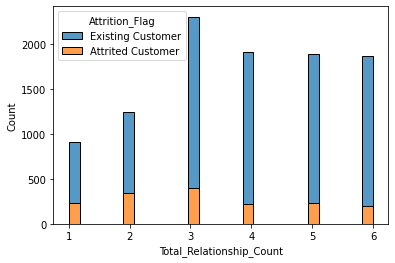

In [200]:
sns.histplot(data=df, x="Total_Relationship_Count", hue="Attrition_Flag", multiple="stack")

Se puede apreciar que para los clientes a los que solo se les vendió 1 o 2 productos, el porcentaje de abandono es más alto que el de aquellos que adquirieron 3 o más productos con el banco. Confirmaremos lo dicho mirando los porcentajes en cuestión:

In [201]:
groupby_Total_Relationship = df.groupby(['Total_Relationship_Count', 'Attrition_Flag'])["CLIENTNUM"].count()
porcentajes_Total_Relationship = groupby_Total_Relationship / df.groupby("Total_Relationship_Count").size() * 100
porcentajes_Total_Relationship_round = porcentajes_Total_Relationship.round(0)
porcentajes_Total_Relationship_format = porcentajes_Total_Relationship_round.map(lambda x: f"{x}%")
print("Porcentajes:")
print(porcentajes_Total_Relationship_format)

Porcentajes:
Total_Relationship_Count  Attrition_Flag   
1                         Attrited Customer    26.0%
                          Existing Customer    74.0%
2                         Attrited Customer    28.0%
                          Existing Customer    72.0%
3                         Attrited Customer    17.0%
                          Existing Customer    83.0%
4                         Attrited Customer    12.0%
                          Existing Customer    88.0%
5                         Attrited Customer    12.0%
                          Existing Customer    88.0%
6                         Attrited Customer    11.0%
                          Existing Customer    89.0%
dtype: object


 Efectivamente, a medida que aumenta la cantidad de productos adquiridos, el porcentaje de abandono baja, del 26% cuando solo adquirió 1 producto, al 11% cuando adquirió 6 productos. Podemos dar por válida la hipótesis planteada.

# Insights y Recomendaciones
En base a las observaciones realizadas al demostrar la validez o rechazo de las hipótesis planteadas, podemos realizar las siguientes recomendaciones al equipo de marketing del banco:

1)	Dada la alta correlación entre la cantidad de contactos realizados por el cliente con la institución y la tasa de abandono, se recomienda investigar a qué corresponden dichos contactos, esto es, si se tratan de reclamos, consultas, pedido de mejora o de adquisición de algún nuevo producto por ejemplo y prestar suma atención en la resolución de dichos “reclamos/consultas” cuando la cantidad de contactos realizados por el cliente supere las 3 veces.

2)	Está claro que la fidelidad del cliente aumenta en la medida que más productos del banco adquiere, por lo que se recomienda realizar campañas de promoción para adquirir nuevos productos, no solo a los clientes detectados de acuerdo al punto anterior para evitar su abandono sino también a aquellos de mayores ingresos y/o con muchos meses de inactividad para fidelizarlos a largo plazo e incentivar un mayor nivel de consumo.

3) Si bien no se pudo demostrar que el no elevar de categoría de tarjeta a los clientes de mayores ingresos significara una mayor tasa de abandono, llama la atención que practicamente no hubiera diferencias entre los tipos de tarjetas asignados a cada segmento. Asignar tarjetas de mayor valor percibido por el cliente, bien podría ser una de las campañas mencionadas en el punto anterior con foco en los clientes de mayores ingresos.

4) En contraste con lo mencionado en el punto anterior, parecería que asignar tarjetas de mayor categoría a los clientes de menores ingresos podría resultar en una mayor tasa de abandono de los mismos.

## Avances

- Definicion de objetivo: Clasificacion de si es probable que un cliente abandone el banco. 
- Contexto Comercial:
- Problema Comercial:
- Contexto Analitico:
- Exploratory Data Analisis:

# Modelos de Machine Learning

A continuación trabajaremos sobre las variables del dataset para adaptarlo y prepararlo para correr distintos modelos de Machine Learning y finalmente evaluar cuál es el que mejor podría predecir posibles casos de abandono de clientes y así brindar al equipo de marketing del banco una eficiente herramienta de predicción automatizada.

## Feature Engineering


En este apartado modificaremos los valores de los campos de nivel de educación y categoría de tarjeta de forma que tengan menos valores únicos, sin perder representatividad, y así otorgarle más eficiencia a los modelos de ML que ejecutaremos.

In [202]:
df[["Education_Level", "Card_Category"]]

,Education_Level,Card_Category
0,High School,Blue
1,Graduate,Blue
2,Graduate,Blue
3,High School,Blue
4,Uneducated,Blue
...,...,...
10122,Graduate,Blue
10123,Graduate,Blue
10124,High School,Blue
10125,Graduate,Blue


In [203]:
# Agruparemos en menos categorías las correspondientes al nivel de educación (Education_Level) para una segmentación más eficiente de los clientes
df['Education_Level_Grouped'] =  np.where(df['Education_Level']=='Uneducated', 'Uneducated', 
                                np.where(df['Education_Level']=='High School', "High School","Graduate or Superior level"))

In [204]:
# Agruparemos también en menos categorías las correspondientes al tipo de tarjeta de crédito asignada (Card_Category) para una segmentación más eficiente de los clientes
df['Card_Category_Grouped'] =  np.where(df['Card_Category']=='Blue', 'Standar', 
                                np.where(df['Card_Category']=='Silver', "Standar","Premium"))

In [205]:
# Comprobamos que se hayan hecho los agrupamientos
df[["Education_Level", 'Education_Level_Grouped', "Card_Category", 'Card_Category_Grouped']]

,Education_Level,Education_Level_Grouped,Card_Category,Card_Category_Grouped
0,High School,High School,Blue,Standar
1,Graduate,Graduate or Superior level,Blue,Standar
2,Graduate,Graduate or Superior level,Blue,Standar
3,High School,High School,Blue,Standar
4,Uneducated,Uneducated,Blue,Standar
...,...,...,...,...
10122,Graduate,Graduate or Superior level,Blue,Standar
10123,Graduate,Graduate or Superior level,Blue,Standar
10124,High School,High School,Blue,Standar
10125,Graduate,Graduate or Superior level,Blue,Standar


## Encoding

A continuación realizaremos el encoding de las variables con datos categóricos y eliminaremos las columnas contrastantes cuando fueron variable de dos valores y aquellas para las cuales ya se habían creado columnas tipo interger:

In [206]:
df_Clasificacion = pd.get_dummies(df, columns=['Education_Level_Grouped', 'Marital_Status', 'Gender', 'Card_Category_Grouped'])
df_Clasificacion.drop(columns=['CLIENTNUM','Education_Level', 'Attrition_Flag', 'Income_Category','Card_Category', 'Card_Category_Grouped_Standar', 'Gender_F', 'Customer_Age'], inplace=True)  
df_Clasificacion.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,birth_year,Income_Category_Value,Education_Level_Grouped_Graduate or Superior level,Education_Level_Grouped_High School,Education_Level_Grouped_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Gender_M,Card_Category_Grouped_Premium
0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,...,1978,3,0,1,0,0,1,0,1,0
1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,...,1974,1,1,0,0,0,0,1,0,0
2,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,...,1972,4,1,0,0,0,1,0,1,0
3,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,...,1983,1,0,1,0,0,1,0,0,0
4,3,21,5,1,0,4716.0,0,4716.0,2.175,816,...,1983,3,0,0,1,0,1,0,1,0


In [207]:
df_Clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Dependent_count                                     10127 non-null  int64  
 1   Months_on_book                                      10127 non-null  int64  
 2   Total_Relationship_Count                            10127 non-null  int64  
 3   Months_Inactive_12_mon                              10127 non-null  int64  
 4   Contacts_Count_12_mon                               10127 non-null  int64  
 5   Credit_Limit                                        10127 non-null  float64
 6   Total_Revolving_Bal                                 10127 non-null  int64  
 7   Avg_Open_To_Buy                                     10127 non-null  float64
 8   Total_Amt_Chng_Q4_Q1                                10127 non-null  float64


## Feature Selection

### A continuación procederemos a realizar la selección de las variables más efectivas para nuestro modelo y de esta forma descartar aquellas que no le aportan resultados significativos con el fin de hacerlo más eficiente y evitar también problemas de sobre entrenamiento de los datos (over fitting). Dado que no estamos tratando con un volumen de características sobredimensionado, entendemos que utilizar el método de eliminación bidireccional (stepwise) puede ser la mejor solución:

In [208]:
X=df_Clasificacion.drop(['Attrition_Flag_Value'],axis=1) #seleccionamos el dataset excepto la variable target Attrition_Flag_Value
y=df_Clasificacion['Attrition_Flag_Value'] #seleccionamos solo la variable target Attrition_Flag_Value

In [211]:
# Creamos una función para que realice este proceso.
# la función necesita cuatro parametros y minimamente dos, data y target
# el tercero y cuarto es opcional, si no se da se toman los valores predefinidos

import statsmodels.api as sm

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [212]:
stepwise_selection(X,y)

<ipython-input-211-c881b63c1ead>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: Futu

['Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Contacts_Count_12_mon',
 'Months_Inactive_12_mon',
 'Gender_M',
 'Marital_Status_Married',
 'Dependent_count',
 'Total_Amt_Chng_Q4_Q1',
 'Credit_Limit',
 'Income_Category_Value',
 'Card_Category_Grouped_Premium']

Las mejores características para el modelo según el método aplicado entonces son:
'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Contacts_Count_12_mon',
 'Months_Inactive_12_mon',
 'Gender_M',
 'Marital_Status_Married',
 'Dependent_count',
 'Total_Amt_Chng_Q4_Q1',
 'Credit_Limit',
 'Income_Category_Value',
 'Card_Category_Grouped_Premium'

In [218]:
# Definimos las variables a conservar:
Variables_a_conservar = ['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Relationship_Count', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Contacts_Count_12_mon',
                     'Months_Inactive_12_mon', 'Gender_M', 'Marital_Status_Married', 'Dependent_count', 'Total_Amt_Chng_Q4_Q1', 'Credit_Limit', 'Income_Category_Value',
                     'Card_Category_Grouped_Premium']

# Eliminamos el resto de las variables:
X = X.drop([col for col in X.columns if col not in Variables_a_conservar], axis=1)


In [222]:
# Verificamos que solo queden las mejores características
X.columns

Index(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Income_Category_Value',
       'Marital_Status_Married', 'Gender_M', 'Card_Category_Grouped_Premium'],
      dtype='object')

## Splitting de dataset

En este apartado realizaremos lo que se denomina el Split del dataset, esto es, dividirlo en datos para entrenamiento y en datos para validación de los resultados obtenidos con dicho entrenamiento. Dado que el dataset incluye solo un 16% de casos de clientes clasificados como perdidos, antes de realizar el split realizaremos un oversampling para balancear la cantidad de datos clasificados como existentes y como perdidos.

In [223]:
# Primero importamos la función que nos permitirá hacer el oversampling
from imblearn.over_sampling import RandomOverSampler

# Hacemos un oversampling para balancear la cantidad de datos target de Attrition_Flag_Value
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y) #realizamos el oversampling del dataset para balancear los datos

Ahora si podemos proceder a realizar el Split:

In [224]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.2, random_state= 42) #hacemos el spliting de training y test
print(y_train.value_counts())
print(y_test.value_counts())

0    6824
1    6776
Name: Attrition_Flag_Value, dtype: int64
1    1724
0    1676
Name: Attrition_Flag_Value, dtype: int64


## Modelado de Machine Learning

A continuación probaremos distintos modelos de Machine Learnig para problemas de clasificación para luego evaluar con cual obtenemos los mejores resultados. Para ello primero importaremos la librería de Scikit-Learn

In [225]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [226]:
import scikitplot as skplt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

### KNN

El primer modelo que probaremos es el de K vecinos más cercanos o KNN por sus siglas en inglés (K Nearest Neighbors).

In [227]:
# Importamos el algoritmo de SKLearn
from sklearn.neighbors import KNeighborsClassifier

# Asignamos a knn el algoritmo de KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) 

# Entrenanoms el modelo knn con las variables en X_train y la variable target en Y_train
knn.fit(X_train,y_train)

# Obtenemos los casos clasificados de X_test con el modelo 
y_pred_knn = knn.predict(X_test) 
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

Accuracy: 0.9435294117647058
ROC AUC Score: 0.950633067351832


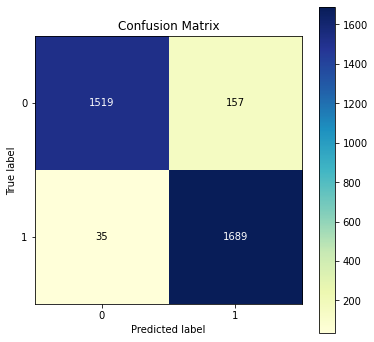

In [228]:
# Graficamos matriz de confusion con 'Y testing' y 'Y_prediccion_knn'
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');

print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn)) 

In [229]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_knn)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1676
           1       0.91      0.98      0.95      1724

    accuracy                           0.94      3400
   macro avg       0.95      0.94      0.94      3400
weighted avg       0.95      0.94      0.94      3400



### Decision Tree

Ahora pasaremos a probar el algoritmo de árbol de decisión o Decisión Tree por su denominación en inglés.

Accuracy: 0.8438235294117648
ROC AUC Score: 0.9324472628454669


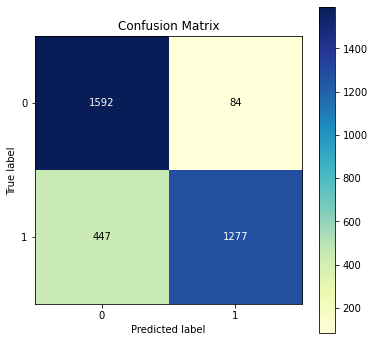

In [230]:
# Importamos el algoritmo de SKLearn
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Creamos el modelo dtc con el algoritmo de DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3) 
dtc.fit(X_train,y_train)

# Obtenemos los casos clasificados de X_test con el modelo
y_pred_dtc = dtc.predict(X_test)  
y_pred_prob_dtc = dtc.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_dtc, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_dtc))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_dtc))

In [231]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_dtc)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1676
           1       0.94      0.74      0.83      1724

    accuracy                           0.84      3400
   macro avg       0.86      0.85      0.84      3400
weighted avg       0.86      0.84      0.84      3400



In [232]:
feature_names = X_test.columns # obtenemos el nombre de las variables que estan en el dataset de training
feature_names

Index(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Income_Category_Value',
       'Marital_Status_Married', 'Gender_M', 'Card_Category_Grouped_Premium'],
      dtype='object')

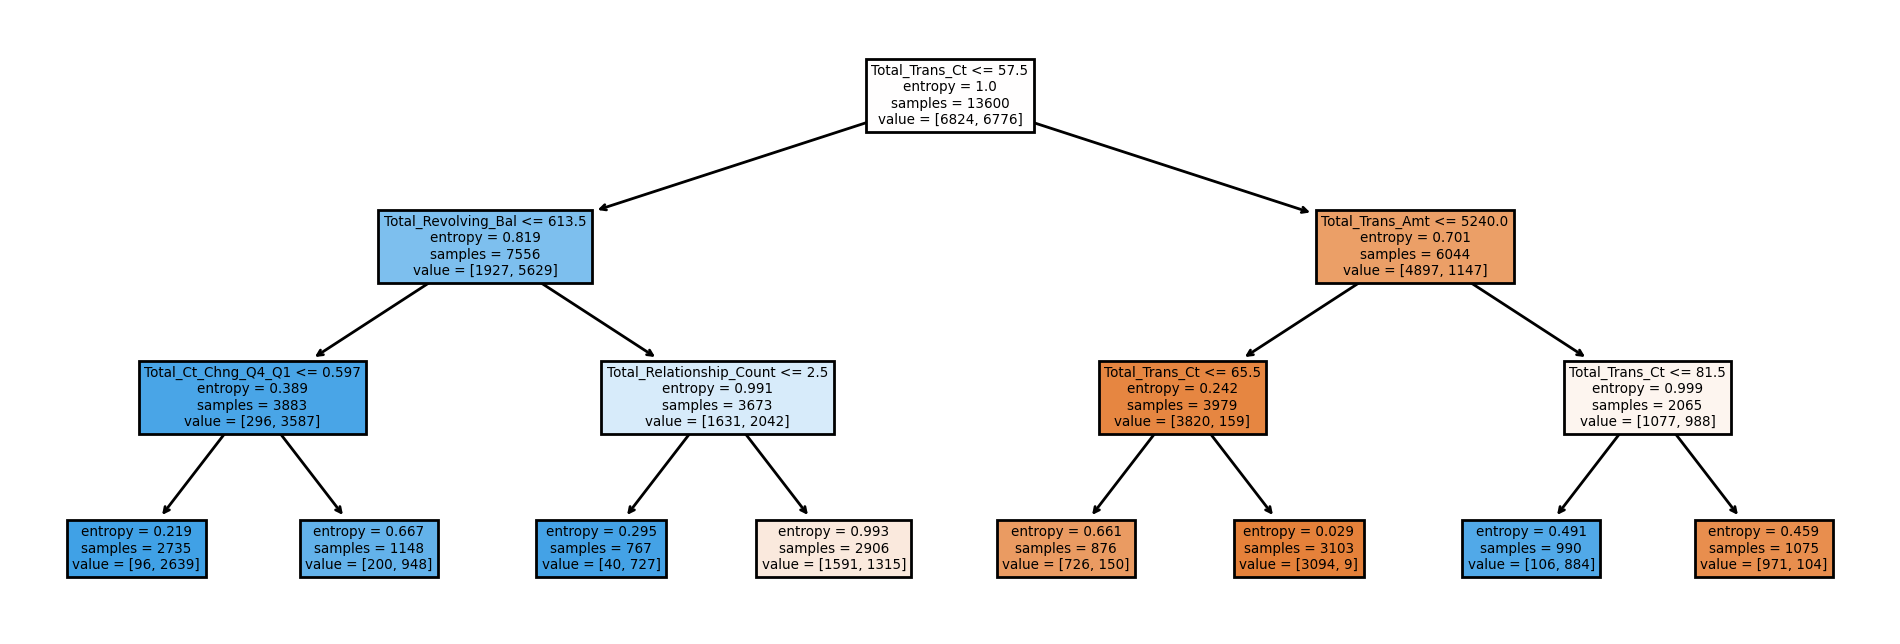

In [233]:
plt.figure(figsize=(12, 4), dpi=200)
plot_tree(dtc, feature_names=feature_names, filled=True) #graficamos el árbol del modelo dtc con los feature names obtenidos
plt.show()

### Random Forest

Finalmente probaremos el algoritmo de Random Forest o bosques aleatorios en español.

Accuracy: 0.9861764705882353
ROC AUC Score: 0.9998029018932493


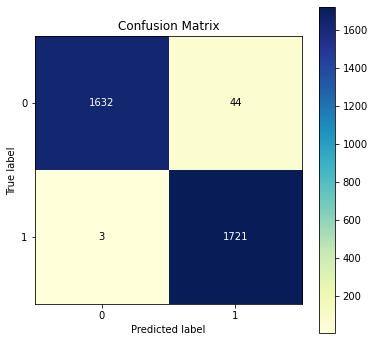

In [235]:
# Importamos el algoritmo de SKLearn
from sklearn.ensemble import RandomForestClassifier

# asignamos a rf el algoritmo de RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100)

# Entrenamos el modelo rf con las variables en X_train y la variable target en Y_train
rf.fit(X_train,y_train)

# Obtenemos los casos clasificados de X_test con el modelo
y_pred_rf = rf.predict(X_test)  
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))

In [236]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_rf)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1676
           1       0.98      1.00      0.99      1724

    accuracy                           0.99      3400
   macro avg       0.99      0.99      0.99      3400
weighted avg       0.99      0.99      0.99      3400



Las métricas obtenidas con este último modelo son demasiado altas, de lo que se desprende que hay un posible sobre ajuste (over fitting) del set de entrenamiento. Trabajaremos a continuación con el análisis de componentes principales (PCA) e hiperparámetros para ver si podemos corregir éste problema.

##Análisis de Componentes Principales (PCA)

In [237]:
#Importamos las librerías pertinentes
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [238]:
pipeline = Pipeline(steps = [('imputer', Imputer), ('pca', PCA())])

In [239]:
#Estandarizamos los datos de test y entrenamiento
train_pca = pipeline.fit_transform(X_train)
test_pca = pipeline.transform(X_test)

In [240]:
# Extracción del objeto pca
pca = pipeline.named_steps['pca']

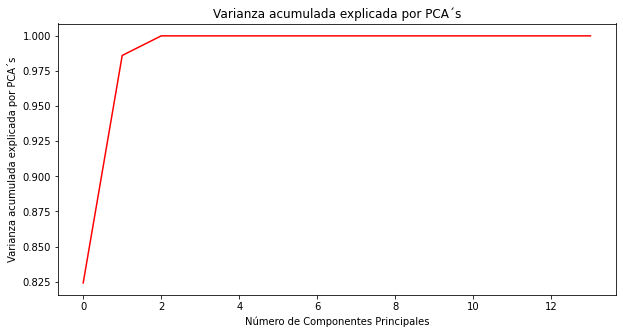

In [241]:
# Graficamos la Varianza acumulada explicada por PCA´s
plt.figure(figsize = (10, 5))
plt.plot(list(range(X_train.shape[1])), np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Número de Componentes Principales'); plt.ylabel('Varianza acumulada explicada por PCA´s');
plt.title('Varianza acumulada explicada por PCA´s');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


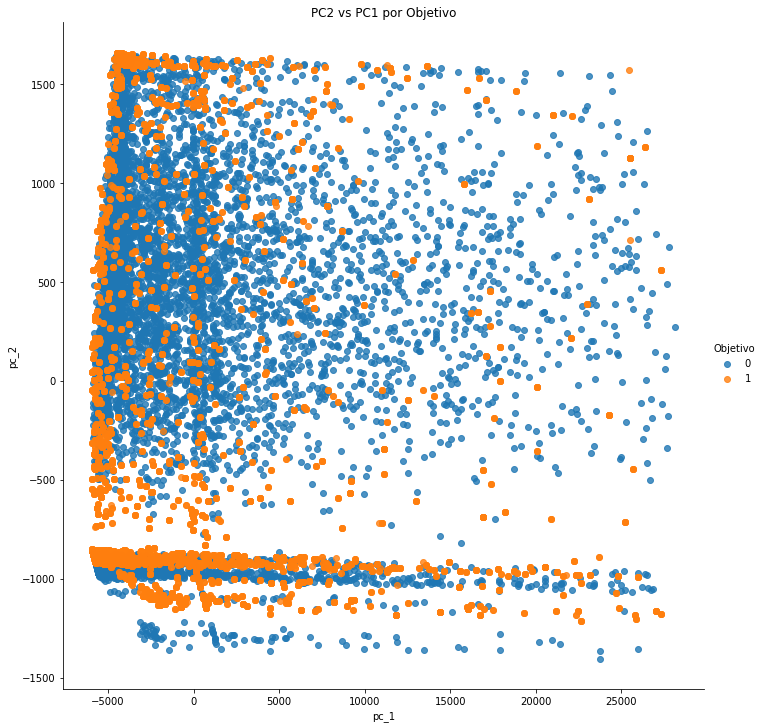

In [242]:
pca_df = pd.DataFrame({'pc_1': train_pca[:, 0], 'pc_2': train_pca[:, 2], 'Objetivo': y_train})

# Graficamos PC2 vs PC1 coloreado por valores objetivo (Atrittion_Flag_Value)
sns.lmplot('pc_1', 'pc_2', data = pca_df, hue = 'Objetivo', fit_reg=False, height = 10)
plt.title('PC2 vs PC1 por Objetivo');

In [243]:
print('2 Componentes Principales explican el {:.4f}% de la varianza.'.format(100 * np.sum(pca.explained_variance_ratio_[:2])))

2 Componentes Principales explican el 98.6049% de la varianza.


## Cross Validation con GridSearch para el Modelo de Random Forest

### Feature Importances

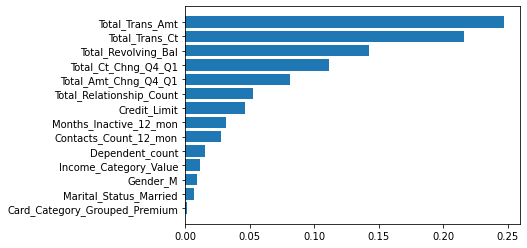

In [244]:
# Seleccion de Feature importances del modelo de Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

### Hyperparametros para Random Forest (Nuevo accuracy:92%)

In [245]:
rf.get_params()  # comenzamos obteniendo los parametros que podriamos ajustar

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [246]:
from sklearn.model_selection import GridSearchCV #importamos el metodo de GridSearch Cross Validation en donde vemos con que grupo de hyperparametros vamos a probar distintos modelos

parametros = {"criterion":("gini","entropy"),
              "n_estimators":(100, 200, 300),
              "max_samples":(1/3, 2/3)              
              }

GridSearch = GridSearchCV(rf, parametros, scoring="accuracy")

GridSearch.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_samples': (0.3333333333333333,
                                         0.6666666666666666),
                         'n_estimators': (100, 200, 300)},
             scoring='accuracy')

In [247]:
sorted(GridSearch.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_samples',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [248]:
GridSearch.cv_results_["params"]

[{'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 100},
 {'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 200},
 {'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 300},
 {'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 100},
 {'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 200},
 {'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 300},
 {'criterion': 'entropy',
  'max_samples': 0.3333333333333333,
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_samples': 0.3333333333333333,
  'n_estimators': 200},
 {'criterion': 'entropy',
  'max_samples': 0.3333333333333333,
  'n_estimators': 300},
 {'criterion': 'entropy',
  'max_samples': 0.6666666666666666,
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_samples': 0.6666666666666666,
  'n_estimators': 200},
 {'criterion': 'entropy',
  'max_samples': 0.6666666666666666,
  'n_estimators': 300}

In [249]:
print(GridSearch.cv_results_["rank_test_score"])
print(GridSearch.cv_results_["mean_test_score"])
print('Mejor Accuracy Obtenido:', GridSearch.best_score_ ) # obtenemos el valor del mejor score de ACCURACY que obtendriamos con los hyperparametros que probamos
print('Mejores Parametros', GridSearch.best_params_) # obtenemos la combinación de los mejores hyperparametros para nuestro modelos

[11  9  6 10  8 12  7  3  4  5  1  2]
[0.92268183 0.92297812 0.92396563 0.92288028 0.92297851 0.92228794
 0.92386701 0.92515018 0.92485408 0.92475566 0.92633532 0.9256445 ]
Mejor Accuracy Obtenido: 0.9263353198542406
Mejores Parametros {'criterion': 'entropy', 'max_samples': 0.6666666666666666, 'n_estimators': 200}


El nuevo accuracy obtenido de 92% resulta más razonable que el obtenido sin ajustar los hyperparámetros.

En resumen, estos son los valores que obtuvimos con los distintos modelos probados:

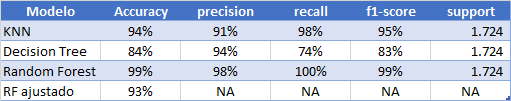

A simple vista las mejores métricas las tiene el modelo de Random Forest sin ajustar, pero claramente ello obedece a una situación de over fitting de los datos. Una vez ajustado el modelo de Random Forest el accuracy está por debajo del modelo KNN que a su vez también supera en el conjunto de métricas al modelo de Decision Tree. Por lo que en conclusión nos quedaríamos con el modelo KNN para predecir los posibles casos de abandono de clientes.